In [1]:
from plyfile import PlyData, PlyElement
import numpy as np
from pyntcloud import PyntCloud
import matplotlib.pyplot as plt
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import scale

PyntCloud
553181 points with 1 scalar fields
0 faces in mesh
0 kdtrees
0 voxelgrids
Centroid: 2.1623694896698, -0.6609352231025696, -0.6974878311157227
Other attributes:



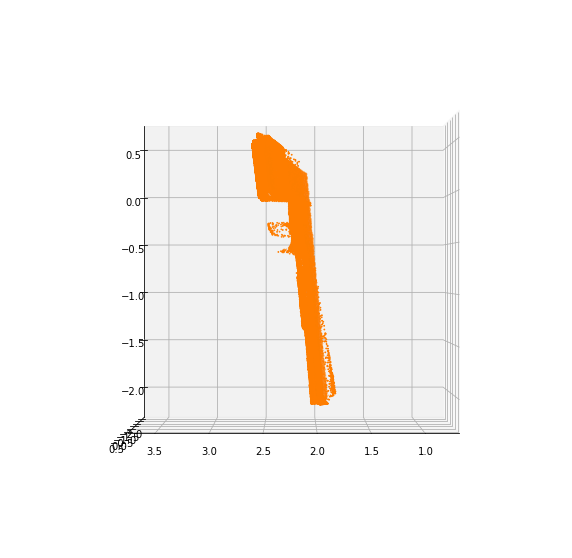

(553181, 3)

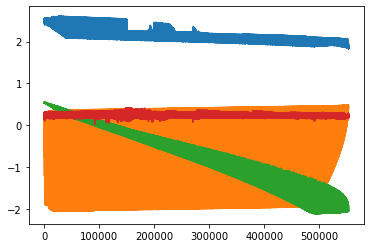

In [2]:
#read point cloud data

cloud = PyntCloud.from_file("Boxes1_clean.ply") 
print(cloud)
display = cloud.plot(return_scene=True)

#convert point cloud data to numpy array

pcloud_np = np.asarray(cloud.points)
pcloud_np_xyz = pcloud_np[:,:3]  #extract first three columns of the array (x,y,x)

plt.plot(pcloud_np)
pcloud_np_xyz.shape

In [33]:
points = pcloud_np
x_col = preprocessing.minmax_scale(points[:,0],feature_range=(0,800)) #first column you want to scale
y_col = preprocessing.minmax_scale(points[:,1], feature_range=(0,600)) #second column you want to scale
z_col = preprocessing.minmax_scale(points[:,1], feature_range=(0,1))
points_norm = np.stack((x_col, y_col,z_col), axis=1) #stack both columns to get a 2d array

#points_norm = preprocessing.minmax_scale(points, feature_range=(0,800), axis=0)
print(points_norm.shape)
points_norm


(553181, 3)


array([[642.1538    , 555.457     ,   0.9257617 ],
       [643.76074   , 533.7584    ,   0.8895974 ],
       [647.46655   , 532.95825   ,   0.88826376],
       ...,
       [ 74.86963   , 584.69916   ,   0.9744986 ],
       [ 72.535645  , 583.72864   ,   0.9728811 ],
       [ 72.52539   , 582.85266   ,   0.9714212 ]], dtype=float32)

In [48]:
# #project points into an image

img = np.zeros((801,601,3)) #initialize empty numpy array of size(800,600)
# r=801
# c=601

points_norm =points_norm        #pass pcloud_np_xyz values to points variable
min_x = min (points_norm[:,0])  #min_x = 0
max_x = max (points_norm[:,0])  #max_x = 800
min_y = min (points_norm[:,1])  #min_y = 0
max_y = max (points_norm[:,1])  #max_y = 600

scale_x = int (800/max_x)       #scale_x =1
scale_y = int (600/max_y)       #scale_y =1

        
for p in range(len(points_norm)):
    u= int (points_norm[p][0]-min_x)*scale_x
    v= int (points_norm[p][1]-min_y)*scale_y
    z= int(points_norm[p][2])
    img[u,v]= [u,v,z] 

ValueError: x and y can be no greater than 2-D, but have shapes (801,) and (801, 601, 3)

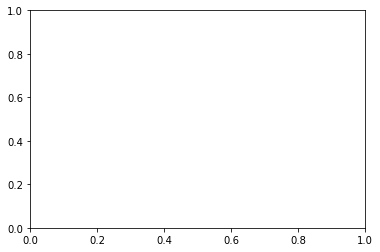

In [59]:
# for i in img:
#     print(z)
# plt.plot(img)

In [ ]:
#databins

x = np.random.randn(100)
print(x)

y = 2 * np.random.randn(100)
print(y)

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.hist2d(x, y, bins = 5)

ax2.hist2d(x, y, bins = 10)
plt.show()

In [112]:
ss = [[1,2],[3,4],[5,6]]
np.asarray(ss).shape

u =0
v = 0
ss[0][0]

for i in ss:
    print(i)
    for j in i:
        print(j)
        u = u +233
        v = v + 232
    ss[i] = int(u)
        

[1, 2]
1
2


TypeError: list indices must be integers or slices, not list

IndexError: invalid index to scalar variable.

In [ ]:
for i in range(len(img)):
        img[i,:] = u
        img[:,j] = v